In [21]:
#import dependencies 
import os
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas
from pymongo import MongoClient

import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.decomposition import PCA

In [22]:
mongo = MongoClient(port=27017)
mongo.list_database_names()

['NetflixContent',
 'SpotifySongs',
 'admin',
 'autosaurus',
 'config',
 'epa',
 'local',
 'netflix',
 'pets_db',
 'petsitly_marketing',
 'school',
 'uk_food']

In [24]:
db = mongo['SpotifySongs']
data_collection = db['SpotifySongs']
data_list = list(data_collection.find())
df = pd.DataFrame(data_list)
df

,_id,track,artist,url,danceability,energy,key,loudness,mode,speechiness,...,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,hit,decade
0,64ed6ad2c7c0a5886fe65008,Jealous Kind Of Fella,Garland Green,https://open.spotify.com/track/1dtKN6wwlolkM8X...,0.417,0.620,3,-7.727,1,0.0403,...,0.000000,0.0779,0.8450,185.655,173533,3,32.94975,9,1,1960
1,64ed6ad2c7c0a5886fe65009,Initials B.B.,Serge Gainsbourg,https://open.spotify.com/track/5hjsmSnUefdUqzs...,0.498,0.505,3,-12.475,1,0.0337,...,0.107000,0.1760,0.7970,101.801,213613,4,48.82510,10,0,1960
2,64ed6ad2c7c0a5886fe6500a,Melody Twist,Lord Melody,https://open.spotify.com/track/6uk8tI6pwxxdVTN...,0.657,0.649,5,-13.392,1,0.0380,...,0.000004,0.1190,0.9080,115.940,223960,4,37.22663,12,0,1960
3,64ed6ad2c7c0a5886fe6500b,Mi Bomba Sonó,Celia Cruz,https://open.spotify.com/track/7aNjMJ05FvUXACP...,0.590,0.545,7,-12.058,0,0.1040,...,0.024600,0.0610,0.9670,105.592,157907,4,24.75484,8,0,1960
4,64ed6ad2c7c0a5886fe6500c,Uravu Solla,P. Susheela,https://open.spotify.com/track/1rQ0clvgkzWr001...,0.515,0.765,11,-3.515,0,0.1240,...,0.000872,0.2130,0.9060,114.617,245600,4,21.79874,14,0,1960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41101,64ed6ad2c7c0a5886fe6f095,Lotus Flowers,Yolta,https://open.spotify.com/track/4t1TljQWJ6ZuoSY...,0.172,0.358,9,-14.430,1,0.0342,...,0.966000,0.3140,0.0361,72.272,150857,4,24.30824,7,0,2010
41102,64ed6ad2c7c0a5886fe6f096,Calling My Spirit,Kodak Black,https://open.spotify.com/track/2MShy1GSSgbmGUx...,0.910,0.366,1,-9.954,1,0.0941,...,0.000000,0.2610,0.7400,119.985,152000,4,32.53856,8,1,2010
41103,64ed6ad2c7c0a5886fe6f097,Teenage Dream,Katy Perry,https://open.spotify.com/track/55qBw1900pZKfXJ...,0.719,0.804,10,-4.581,1,0.0355,...,0.000003,0.1390,0.6050,119.999,227760,4,20.73371,7,1,2010
41104,64ed6ad2c7c0a5886fe6f098,Stormy Weather,Oscar Peterson,https://open.spotify.com/track/4o9npmYHrOF1rUx...,0.600,0.177,7,-16.070,1,0.0561,...,0.868000,0.1490,0.5600,120.030,213387,4,21.65301,14,0,2010


<Axes: >

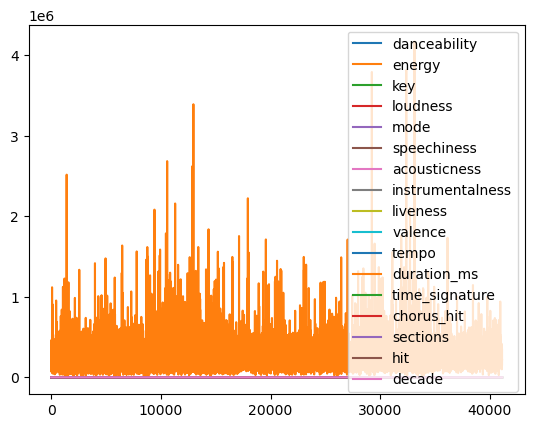

In [25]:
#visualizing data
df.plot()

              precision    recall  f1-score   support

           0       0.83      0.72      0.77      5196
           1       0.75      0.84      0.79      5081

    accuracy                           0.78     10277
   macro avg       0.79      0.78      0.78     10277
weighted avg       0.79      0.78      0.78     10277

Accuracy: 0.7833025201907171


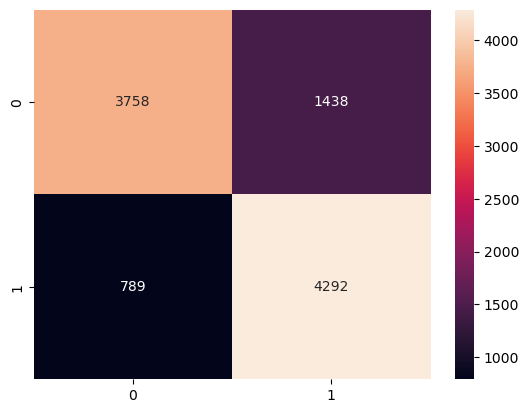

In [27]:
# Split your dataset into features (X) and target variable (y)
X = df[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
                 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
                 'duration_ms', 'time_signature', 'chorus_hit', 'sections']]
y = df['hit']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the RandomForestClassifier
model = RandomForestClassifier(random_state=0)

# Train the model on scaled training data
model.fit(X_train_scaled, y_train)

# Make predictions on scaled testing data
y_pred = model.predict(X_test_scaled)

# Evaluate the model
cnf = confusion_matrix(y_test, y_pred)
sns.heatmap(cnf, annot=True, fmt='.0f')
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

In [60]:
X_test_scaled[0]

array([ 0.26910732,  0.48440913, -0.62587611,  0.92446562,  0.66276872,
       -0.53574118, -0.14301772, -0.50761062, -0.07024721,  0.20398649,
       -0.45516711, -0.00193128,  0.25398212, -0.16235343,  0.52772763])

In [61]:
X1 = ([[ 0.26910732,  0.48440913, -0.62587611,  0.92446562,  0.66276872,
       -0.53574118, -0.14301772, -0.50761062, -0.07024721,  0.20398649,
       -0.45516711, -0.00193128,  0.25398212, -0.16235343,  0.52772763]])
y_pred = model.predict(X1)
y_pred

array([1], dtype=int64)

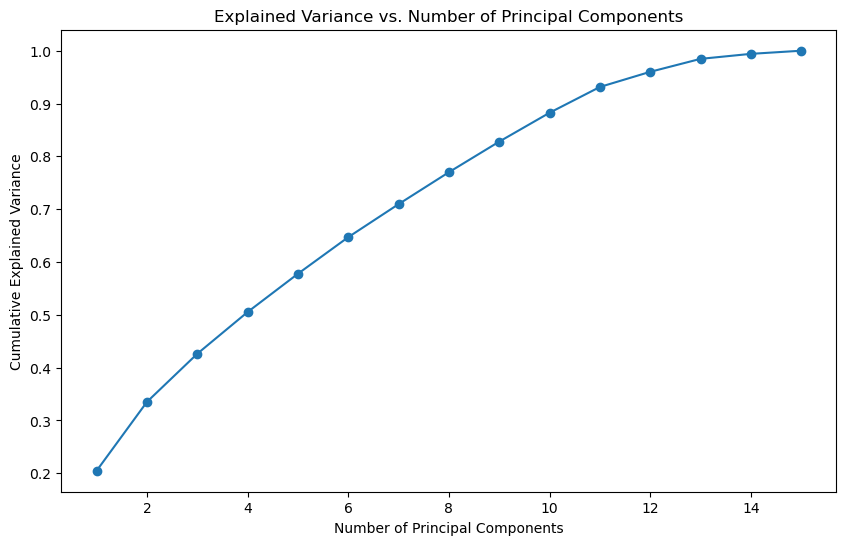

Number of components to explain 95% of variance: 12


In [28]:
pca = PCA()

# Fit PCA on the scaled training data
pca.fit(X_train_scaled)

# Plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Principal Components')
plt.show()

# Find the number of components needed to explain a certain threshold of variance
cumulative_variance_threshold = 0.95  # Set your desired threshold
num_components = next(i for i, cum_var in enumerate(pca.explained_variance_ratio_.cumsum()) if cum_var >= cumulative_variance_threshold) + 1

print(f"Number of components to explain {cumulative_variance_threshold:.0%} of variance:", num_components)

# Perform PCA with the selected number of components
pca = PCA(n_components=num_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)